# 04 신경망 학습

## 4.1. 데이터

* 학습이란? 훈련 데이터로부터 가중치 매개변수의 최적값을 자동으로 획득하는 것

* 알고리즘 설계하기

1) 이미지 또는 컴퓨터 비전 등 데이터 -> 특징(벡터, SIFT, SURF 등) 추출 (사람이 설계) -> 기계학습(SVM, KNN 등)
2) 신경망(딥러닝)

* 종단간 기계학습(end-to-end machine learning) : 데이터(입력)에서 목표한 결과(출력)를 사람의 개입 없이 얻는다는 뜻

신경망은 주어딘 데이터를 온전히 학습하고, 주어진 문제의 패턴을 발견하려 시도한다.

* 훈련 데이터와 시험 데이터

기계학습 문제는 데이터를 훈련 데이터(training data)와 시험 데이터(test data)로 나누어 실험을 수행한다.

훈련 데이터로 최적의 매개변수를 찾은 후 시험 데이터로 앞서 훈련한 모델의 실력 평가 => 범용 능력 판단

범용 능력 : 아직 보지 못한 데이터(훈련 데이터에 포함되지 않는 데이터)로도 문제를 올바르게 풀어내는 능력

* 오버피팅(overfitting) : 한 데이터셋에만 지나치게 최적화된 상태

## 4.2. 손실 함수

신경망은 손실 함수 지표를 기준으로 최적의 매개변수 값을 탐색한다.

#### 4.2.1. 평균 제곱 오차(mean squared error, MSE)

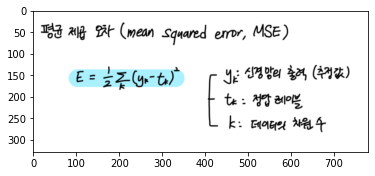

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as img

image = img.imread('img/04.png')
plt.imshow(image)
plt.show()

* 원-핫 인코딩 : 한 원소만 1로 하고 그 외는 0으로 나타내는 표기법

In [1]:
def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

In [3]:
# 예시.

# 정담은 '2'
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# '2' 일 확률이 가장 높다고 추정(0.6)
import numpy as np

y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
mean_squared_error(np.array(y), np.array(t))

0.09750000000000003

In [4]:
# '7'일 확률이 가장 높다고 추정(0.6)
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
mean_squared_error(np.array(y), np.array(t))

0.5975

#### 4.2.2. 교차 엔트로피 오차(cross entropy error, CEE)

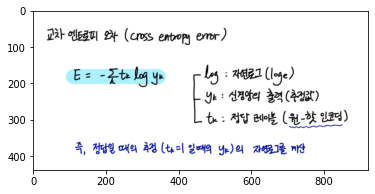

In [5]:
image = img.imread('img/05.png')
plt.imshow(image)
plt.show()

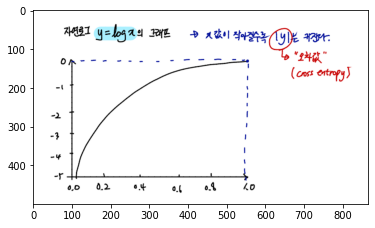

In [7]:
image = img.imread('img/06.png')
plt.imshow(image)
plt.show()

In [8]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))
# no.log() 함수에 0을 입력하면 "-inf"가 되어 더 이상 계산 진행할 수 없으므로 아주 작은 값인 delta를 더해줌

In [9]:
# 정답은 '2', '2'로 추정
t = [0, 0, 1, 0 ,0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [11]:
# 정답은 '2', '7'로 추정
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

2.302584092994546

#### 4.2.3. 미니배치 학습

* 미니배치(mini-batch) 학습 : 데이터의 수가 많은 경우 훈련 데이터로부터 일부만 골라 학습 전체의 '근사치'로 이용하여 학습 수행

In [23]:
# MNIST 데이터셋 읽어오기

import sys, os
os.chdir("deep-learning-from-scratch/dataset/")
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from dataset.mnist import load_mnist

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape) # 입력 데이터는 784열(28X28)
print(t_train.shape) # 정답 레이블 10줄

(60000, 784)
(60000, 10)


In [24]:
# 훈련 데이터에서 무작위로 10개 빼내기
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

#### 4.2.4. (배치용) 교차 엔트로피 오차 구현하기

In [25]:
# 정답 레이블(t)이 원-핫 인코딩인 경우

def cross_entropy_error(y, t):
    if y.ndim == 1:    # y가 1차원이라면, 즉 데이터 하나당 교차 엔트로피 오차를 구하는 경우엔 reshape 함수로 데이터의 형상을 바꾸어줌.
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size    # 이미지 1장당 평균 교차 엔트로피 오차 계산

In [27]:
# 정답 레이블(t)이 원-핫 인코딩이 아닌 숫자 레이블인 경우

def cross_entropy_error(y, t):
    if y.ndim == 1: 
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size 

* np.arange(batch_size) : 0부터 batch_size-1까지 배열 생성

#### 손실 함수 설정 이유

신경망 학습에서 최적의 매개변수를 탐색할 때 매개변수의 미분(기울기)을 계산하고, 갱신한다.

미분 값에 따라 손실 함수를 줄이는 방향으로 매개변수를 갱신한다.

만약 미분 값이 0이라면 가중치 매개변수의 갱신을 멈추게 된다.

정확도를 지표로 삼으면 매개변수의 미분이 대부분의 0이 되므로 정확도를 지표로 삼아서는 안된다.***

=> 정확도는 매개변수의 미소한 변화에는 거의 반응을 보이지 않고, 반응이 있더라도 그 값이 불연속적으로 갑자기 변화한다.